# The goal of this notebook is to examine the ABCD matrices for a specific example and confirm several relationships between them as generated by the Potapov code.

In [1]:
import Roots
import Potapov
import Examples
import Time_Sims
import functions
import tests

import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def contour_plot(Mat,func = abs):
    '''
    Make a simple plot to view a matrix

    Args:
        Mat (compelx-valued matrix): a matrix to view
        func (optional[function]): a function to apply to each component

    Generates a plot of the matrix.
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(func(Mat), interpolation='nearest')
    fig.colorbar(cax)
    plt.show()


In [15]:
Ex = Examples.Example3(r1 = 0.9, r3 = 0.9, max_linewidth=35.,max_freq=25.)
Ex.run_Potapov()
E = Ex.E
roots = Ex.roots
M1 = Ex.M1
delays = Ex.delays
modes = functions.spatial_modes(roots,M1,E)

In [16]:
roots

[(-0.36514939263783186-10.901513851604911j),
 (-0.33972600185569823+20.178467995423109j),
 (-0.36514939263783186+10.901513851604911j),
 (-0.33972600185569823-20.17846799542311j),
 (-0.3376937738186606-4.1474624048492497e-23j)]

In [17]:
A,B,C,D = Potapov.get_Potapov_ABCD(Ex.roots,Ex.vecs,Ex.T,z=0.)

In [18]:
Omega = (A-A.H)/(2j)

To obtain the SLH from the ABCD, we can use that for a passive system $\Omega = (A - A^H)/2i$.

We generate $B$ and $C$ in such a way that $B = C^H$.


Also notice that $(A+A^H)/2 = BC/2$.

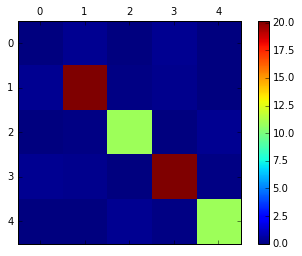

In [19]:
contour_plot(Omega)

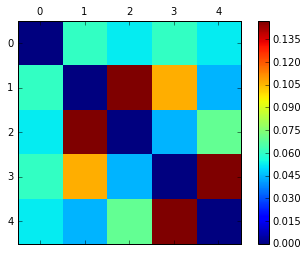

<function matplotlib.pyplot.show>

In [28]:
## Let's look at the off-diagonal elements
Omega2 = - (A.imag+A.imag.H)/2
for i in range(Omega2.shape[0]):
    Omega2[i,i]=0
    
contour_plot(Omega2)
plt.show

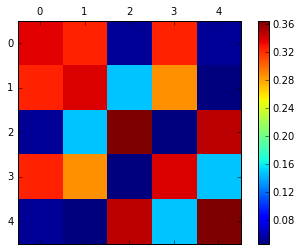

In [20]:
contour_plot((A+A.H)/2.)

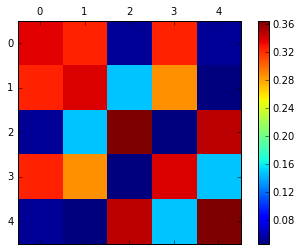

In [21]:
contour_plot(B*C/2.)

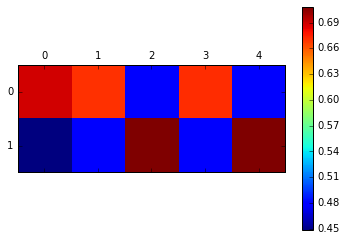

In [22]:
contour_plot(B.H)

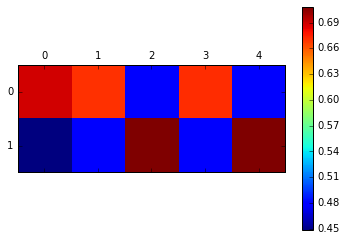

In [23]:
contour_plot(C)